In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import MaxPooling2D, Flatten, Dense, Dropout, Conv2D
from tensorflow.keras.utils import to_categorical

In [2]:
# Load MNIST data
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

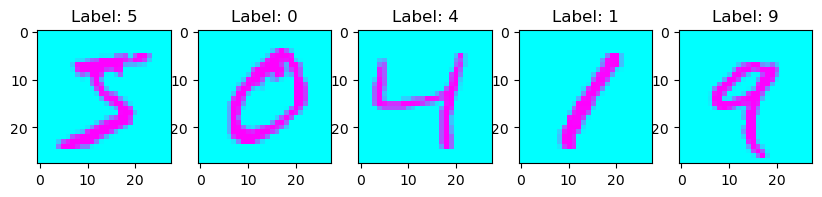

In [3]:
# Display the first five images in the training set along with the labels
fig, axes = plt.subplots(1, 5, figsize=(10, 2))

for i in range(5):
    axes[i].imshow(x_train[i], cmap='cool') # definitely the most fun color map ,but also slightly more accurate than grey
    axes[i].set_title(f'Label: {y_train[i]}')

plt.show()

In [4]:
# Do preprocessing on the dataset

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [5]:
# Build a CNN model
model = Sequential()

# most of these options came from a combo of kaggle and stack overflow examples.  
# Tried to explain them the best as i understand them

# Create a convolutional layer that intrroduces non-linearity on a 28x28 sized image
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))

# This reduces overfitting by downsampling the values in a smaller window size
model.add(MaxPooling2D(pool_size=(2, 2)))

# repeat the filters/non-linearity for the previously downsampled layer
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Make the 2D map into a vector
model.add(Flatten())

# Add a dense layer with activation (introduces non-linearity)
model.add(Dense(128, activation='relu'))

# Add a dropout to prevent overfitting (my model accuracy without was 99% accurate, which is suspect)
model.add(Dropout(0.5))

# Create a layer with 10 neurons, one for each label (in this case digits 0-9), 
# with an activation to do a probability distribuution
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
# Fit the model to the training set
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5, batch_size=200)

# Print model accuracy
score = model.evaluate(x_test, y_test, verbose=0)
print(f'Test loss: {score[0]}')
print(f'Test accuracy: {score[1]}')

Epoch 1/5
300/300 [==============================] - 48s 159ms/step - loss: 0.3486 - accuracy: 0.8940 - val_loss: 0.0681 - val_accuracy: 0.9793
Epoch 2/5
300/300 [==============================] - 43s 143ms/step - loss: 0.1044 - accuracy: 0.9688 - val_loss: 0.0483 - val_accuracy: 0.9836
Epoch 3/5
300/300 [==============================] - 43s 144ms/step - loss: 0.0782 - accuracy: 0.9764 - val_loss: 0.0381 - val_accuracy: 0.9867
Epoch 4/5
300/300 [==============================] - 44s 147ms/step - loss: 0.0625 - accuracy: 0.9817 - val_loss: 0.0346 - val_accuracy: 0.9869
Epoch 5/5
300/300 [==============================] - 46s 153ms/step - loss: 0.0560 - accuracy: 0.9837 - val_loss: 0.0266 - val_accuracy: 0.9904
Test loss: 0.0266167763620615
Test accuracy: 0.9904000163078308


313/313 [==============================] - 2s 7ms/step


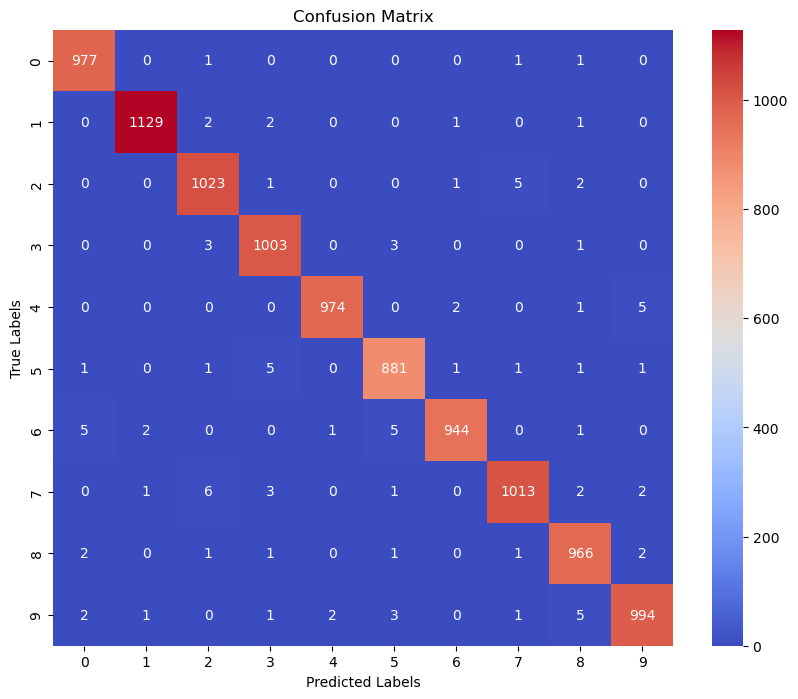

In [7]:
# Display a confusion matrix

# Make predictions on the test set
y_pred = model.predict(x_test)
y_pred_classes = y_pred.argmax(axis=1)
y_true = y_test.argmax(axis=1)

conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Then visualize it
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='coolwarm', xticklabels=range(10), yticklabels=range(10), cbar=True)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

### Summary {-}
The accuracy on the CNN was _very_ high, almost to the point where I wondered if I made a mistake and it was overfitted. I added a dropout layer to try to prevent the model from getting to reliant on specific neurons, but even when adding the dropout I still had high accuracy. I experimented with multiple color maps trying to find the most accurate one the CNN could learn from, and finally settled on "cool" as the most accurate (though the differene in accuracy was minimal).

Looking at the confusion matrix, we can see very few incorrect predictions.  Interestingly, the "1" digit was the most accurate, but I guess that makes sense because it would be the simplest shape and, therefore, the hardest one to predict incorrectly.